# Lattice design - Proton therapy system

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xpart as xp
import xtrack as xt
import xplt

In [114]:
dipole_length = 1.0
dipole_angle = -(1/12)*2*np.pi
dipole_bending_radius = dipole_length/dipole_angle

quad = xt.Quadrupole(length=0.5)
drift = xt.Drift(length=0.5)
bend = xt.Bend(length=1.0, k0=1/dipole_bending_radius, h=1/dipole_bending_radius)

elements_beamline = {
    'degrader': xt.Marker(),
    'd1': drift.copy(),
    'q1': quad.copy(),
    'd2': drift.copy(),
    'q2': quad.copy(),
    'd3': drift.copy(),
    'q3': quad.copy(),
    'd4': drift.copy(),
    'focal': xt.Marker(),
    'd5': drift.copy(),
    'b1': bend.copy(),
    'd6': drift.copy(),
    'b2': bend.copy(),
    'd7': drift.copy(),
    'q4': quad.copy(),
    'd8': drift.copy(),
    'q5': quad.copy(),
    'd9': drift.copy(),
    'd10': drift.copy(),
    'slits': xt.Marker(),
 }

beamline = xt.Line(
    elements=elements_beamline,
    element_names=elements_beamline.keys()
)

# Define reference particle
beamline.particle_ref = xt.Particles(p0c=150e6, mass0=xt.PROTON_MASS_EV)
beamline.build_tracker()

In [115]:
sv = beamline.survey()

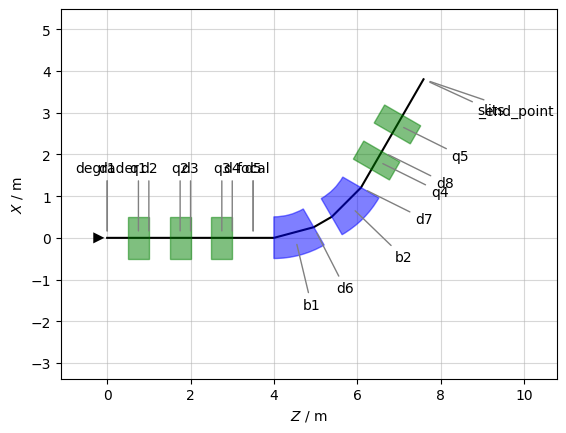

In [116]:
plot = xplt.FloorPlot(sv.rows[:], fodo_cell, 
    labels = True,
    boxes={  
        "q.": dict(color="green"), 
        "b.": dict(color="blue")
    },
)

In [117]:
beamline.vars['kq1'] = 0
beamline.vars['kq2'] = 0
beamline.vars['kq3'] = 0
beamline.vars['kq4'] = 0
beamline.vars['kq5'] = 0

beamline.element_refs['q1'].k1 = beamline.vars['kq1']
beamline.element_refs['q2'].k1 = beamline.vars['kq2']
beamline.element_refs['q3'].k1 = beamline.vars['kq3']
beamline.element_refs['q4'].k1 = beamline.vars['kq4']
beamline.element_refs['q5'].k1 = beamline.vars['kq5']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


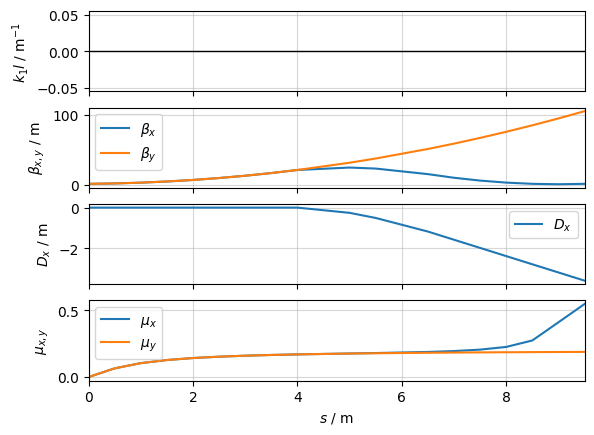

In [118]:
tw = beamline.twiss(
    method='4d',
    dx=0.0,
    dpx=0.0,
    betx=1.0,
    bety=1.0,
    alfx=-0.3,
    alfy=-0.3,
    start='degrader',
    end='slits',
)
xplt.TwissPlot(tw, line=beamline, line_kwargs={'knl': 'k1l'}, kind="bet,dx, mux+muy")

In [119]:
# Match tunes and chromaticities to assigned values
opt = beamline.match(
    method='4d',
    dx=0.0,
    dpx=0.0,
    betx=1.0,
    bety=1.0,
    alfx=-0.3,
    alfy=-0.3,
    start='degrader',
    end='slits',
    vary=[
        xt.VaryList(['kq1', 'kq2', 'kq3'], step=1e-8, tag='quad'),
    ],
    targets = [
        #xt.TargetSet(alfx=0.1, alfy=0.1, at='focal', tol=1e-6, tag='tune'),
        xt.TargetSet(betx=15, bety=10, at='focal', tol=1e-6, tag='tune'),
    ])

Matching: model call n. 69               



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


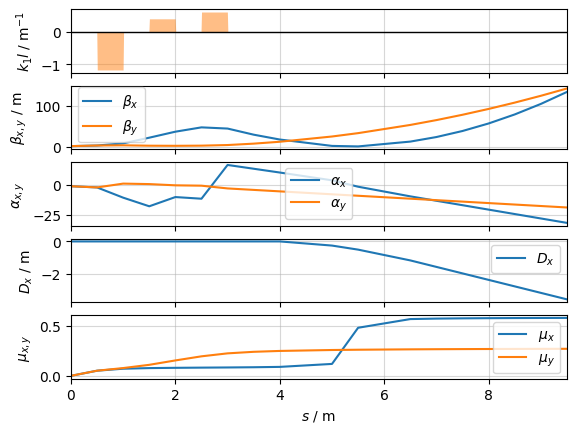

In [120]:
tw = beamline.twiss(
    method='4d',
    dx=0.0,
    dpx=0.0,
    betx=1.0,
    bety=1.0,
    alfx=-1,
    alfy=-1,
    start='degrader',
    end='slits',
)
xplt.TwissPlot(tw, line=beamline, line_kwargs={'knl': 'k1l'}, kind="bet,alf,dx, mux+muy")

In [121]:
# Match tunes and chromaticities to assigned values
opt = beamline.match(
    method='4d',
    dx=0.0,
    dpx=0.0,
    betx=1.0,
    bety=1.0,
    alfx=-0.3,
    alfy=-0.3,
    start='degrader',
    end='slits',
    vary=[
        xt.VaryList(['kq4', 'kq5'], step=1e-8, tag='quad'),
    ],
    targets = [
        xt.TargetSet(dx=-4, dpx=0, at='slits', tol=1e-6, tag='tune'),
    ])

Matching: model call n. 17               



In [122]:
opt.target_status()
opt.vary_status()

Target status:                           
id state tag  tol_met      residue  current_val target_val description                                 
 0 ON    tune    True -2.14791e-09           -4         -4 ('dx', 'slits'), val=-4, tol=1e-06, weig ...
 1 ON    tune    True -1.81288e-09 -1.81288e-09          0 ('dpx', 'slits'), val=0, tol=1e-06, weig ...
Vary status:                 
id state tag  met name lower_limit current_val upper_limit val_at_iter_0  step weight
 0 ON    quad OK  kq4  None           -1.52818 None                    0 1e-08      1
 1 ON    quad OK  kq5  None            1.17538 None                    0 1e-08      1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


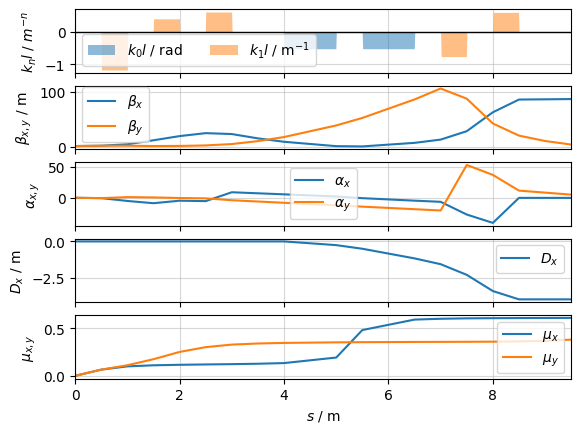

In [123]:
tw = beamline.twiss(
    method='4d',
    dx=0.0,
    dpx=0.0,
    betx=1.0,
    bety=1.0,
    alfx=-0.3,
    alfy=-0.3,
    start='degrader',
    end='slits',
)
xplt.TwissPlot(tw, line=beamline, line_kwargs={'knl': 'k0l+k1l'}, kind="bet,alf,dx, mux+muy")

In [124]:
# Match tunes and chromaticities to assigned values
opt = beamline.match(
    method='4d',
    dx=0.0,
    dpx=0.0,
    betx=1.0,
    bety=1.0,
    alfx=-0.3,
    alfy=-0.3,
    start='degrader',
    end='slits',
    vary=[
        xt.VaryList(['kq1', 'kq2', 'kq3', 'kq4', 'kq5'], step=1e-8, tag='quad'),
    ],
    targets = [
        xt.TargetSet(betx=1, bety=1, at='slits', tol=1e-6, tag='tune'),
        xt.TargetSet(dx=-4, dpx=0, at='slits', tol=1e-6, tag='tune'),
    ])

Matching: model call n. 49               



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


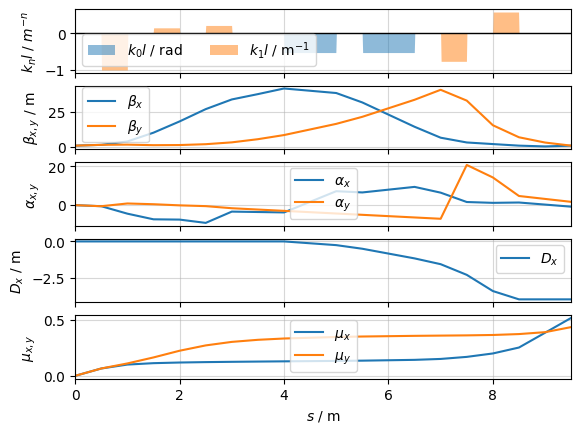

In [125]:
tw = beamline.twiss(
    method='4d',
    dx=0.0,
    dpx=0.0,
    betx=1.0,
    bety=1.0,
    alfx=-0.3,
    alfy=-0.3,
    start='degrader',
    end='slits',
)
xplt.TwissPlot(tw, line=beamline, line_kwargs={'knl': 'k0l+k1l'}, kind="bet,alf,dx, mux+muy")